# Check or Mask? Sentimental Analysis on COVID-19 Media Articles


# Overview 

In this project, we are analyzing the change of sentiments over time of two events: distributing stimulus checks and the event that Trump begin to wear mask in public for the first time. We found the dataset from Kaggle and the dataset consists of the information of online articles scraped from online media starting from Jan 2nd, 2020. We first cleaned the dataset by dropping unnecessary rows and columns and create two dataframes that are corresponding with the two events we will analyze. Then, we analyzed and created several bar plots, line plots, box plots, and tables to visualize key elements such as sentiment score, most common words, and topic areas to see which event caused a larger change in sentiments. In conclusion, by comparing data from box plots, we conclude that the event of distributing stimulus checks caused a larger change in sentiments than the event of appealing for wearing masks. 

## Name
- Qiwen Zhang
- Jiali Qian
- Zijie Qi
- Mai Yang
- Guanchen Luo

# Research Question
Which event caused a larger change in sentiments in media articles? The government distributing stimulus checks or Trump wearing a mask in public?


## Background and Prior Work
#### Background
Our group picked COVID-19 as our research topic because it is an unprecedented crisis in modern history. It has fundamentally changed the world in terms of economy, international relations, and many other aspects. Among the vast fields related to COVID-19, we are most interested in the mass media because when people are staying at home, they rely heavily on the news media as the main source of information. With the occurrence of various major events during the pandemic, the attitude of the news media was also changing. To further explore how these events impacted mass media and in which way, we chose two of them: the stimulus check and Trump wearing a mask in public for the first time.

#### Prior Work
Stimulus check seems good news for everyone to some extent. We think that under the mostly negative atmosphere of the pandemic, the distribution of stimulus check might be a source that changed people’s overall attitudes. However, from another aspect, though the announcement of releasing stimulus checks might be good news for the public, news media reporting may be more rational in analyzing the actual effects of such checks. For example, people found that stimulus check is actually not that effective in covering the expenses of a household according to Li and Mutchler (Li & Mutchler, 2020). 
Apart from stimulus check, another event we chose is Trump appealing for wearing masks in front of public for the first time. As from our opinion, this act of appealing will mostly lead to negative comments in mass media, but there's also possibility that we are biased. For example, there are plenty of trump’s supporters that can make the sentiment overall on the media not that inclined to the negative side. It also makes sense that with all these positive attitudes and information, another side of the discussion, the people who understood how disastrous the virus will be, will exaggerate the virus to raise the public’s attention, thus may produce negative sentiments. Anyways Trump still holds a sizable discussion around him on the topic of wearing masks, so we think that Trump wear mask in front of public may also change the sentiment of news reporting to some extent (Sanders et al, 2020). Therefore, we are quite curious about how these two factors will influence the sentiments in mass media. 
Besides, from the side of mass media, there’s often a "strong link between sentiment and subsequent economic activity, especially the business investment and consumer spending" the stimulus checks distributed are predictably effective in changing consumer spending, therefore this change should also be reflected in news sentiments according to this study (Buckman et al, 2020).

#### References:
1. Yang Li & Jan E Mutchler (2020) Older Adults and the Economic Impact of the COVID-19 Pandemic, Journal of Aging & Social Policy, 32:4-5, 477-487, DOI: 10.1080/08959420.2020.1773191
2. Abraham Sanders, Rachael White, Lauren Severson, Rufeng Ma, Richard McQueen, Haniel Campos Alcanatara Paulo, Yucheng Zhang,  John S Erickson,  Kristin P Bennett (2020) Unmasking the conversation on masks: Natural language processing for topical sentiment analysis of COVID-19 Twitter discourse DOI: https://doi.org/10.1101/2020.08.28.20183863
3. Shelby R. Buckman & Adam Hale Shapiro & Moritz Sudhof & Daniel J. Wilson, 2020. "News Sentiment in the Time of COVID-19," FRBSF Economic Letter, Federal Reserve Bank of San Francisco, vol. 2020(08), pages 1-05, April.

#### Why important:
Since media is one of the most important factors that influence people’s opinions, especially during such a pandemic, the public’s opinions or sentiments are quite essential in determining ways to minimize the negative effect of the pandemic, thus, studying factors that might have an influence on news reports is informative in helping us capture the public’s sentiment. This analysis will help us to know whether the president’s attitude or actual action like releasing checks is more effective in influencing media reports and then influence the public’s opinions. 

## Hypothesis

We hypothesize that the event of releasing stimulus checks resulted in a greater change in sentiments than the event of Trump wearing mask in front of public did in media articles. Thie hypothesis relies on our thoughts that releasing stimulus checks was more of a concrete and direct benefit for the public and had broad impacts on the economy, whereas the effect of wearing mask was more indirect. Hence, we hypothesize that distributing stimulus checks would cause a greater change in sentiments.

## Datasets
The dataset is from Kaggle, [Covid-19 Public Media Dataset by Anacode](https://www.kaggle.com/jannalipenkova/covid19-public-media-dataset).

The goal of this project is to analyze the sentiments of articles that are published within the 2 weeks before and after the two events happened. The two events are 1. US government released stimulant checks 2. Trump encourged and started to wear masks in front of the public. Hence, the primary variable we are concerned with is the text of the media articles describing covid-19 so the sentiment of the text for each article can be analyzed. Secondly, since the project is restricted to a certain period, the date is the other important variable, so we can divide the dataset into two parts, 2 weeks before and after, to analyze the change in median sentiment in media articles. We also used the topic area variable in data analysis when exploring the driving forces because business, one of the topic areas, is strongly related to the stimulant check events we will analyze. The dataset has no missing values. All the variables are stored as strings. During data cleaning, we converted date to datetime objects for more convenient data analysis.

The main observations of the dataset are the online articles with full texts which were scraped from online media under two time durations, mainly concentrated on the non-medical aspects of pneumonia in COVID-19. According to our hypothesis, the project would analyze the sentiment score for each media article of each duration, and thus understand the public's reactions to the release of stimulant check and that Trump wears a mask in public for the first time. In order to achieve our goal, we need to divide each duration into two time intervals: two weeks before and after the event.

The first time duration is from March 30th,2020 to April 27th,2020 which is two weeks before and after the U.S. government released the stimulant check release date (April 13th,2020). The second time duration is from June 28th,2020 to July 26th,2020 which are two weeks before and after the date the president of the U.S. Donald J. Trump started to wear a face mask in public and also appealed to the public to wear masks (July 12th,2020). The original dataset contains 213579 observations from January 2nd,2020 to July 26th,2020. After cleaning the data, the actual valid observations for each time duration are 38887 rows for stimulant check event and 51921 rows for Trump's wearing mask event. Each valid observation includes the title, author, URL, full text, domain, topic area, and the publication date.

## Import Package

In [1]:
#import packages
import pandas as pd
import numpy as np
import sys
import csv
import re
import seaborn as sns
import string

#import natural language toolkit
import nltk

# download stopwords & punkt
nltk.download('stopwords')
nltk.download('punkt')
nltk.downloader.download('vader_lexicon')

#standardize plot size and font size
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 14})

#import natural language processing related functions 
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer 



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Owen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Data Cleaning

In [2]:
#read 21 csv files and merge them into one dataframe
base = pd.read_csv('covid19_articles_1.csv', index_col='id')
for i in range(2, 22):
    temp = pd.read_csv('covid19_articles_' + str(i) + '.csv', index_col='id')
    base = pd.concat([base, temp])

In [3]:
#drop unrelated columns
base = base.drop(['url', 'crawled_time', 'author'], axis=1)
base

,domain,title,date,content,topic_area
id,,,,,
0,marketbeat,Three Industrial Giants You Should Own In 2020,2020-01-02,"Posted on Thursday, January 2nd, 2020 by Thoma...",business
1,marketbeat,Labor Stocks Are Going To Break Out In 2020,2020-01-03,"Posted on Friday, January 3rd, 2020 by Thomas ...",business
2,marketbeat,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",2020-01-03,"It could be forgiven, that some might think th...",business
3,marketbeat,Cal-Maine Just Shed 12% - But Is Now The Time ...,2020-01-06,"Posted on Monday, January 6th, 2020 by Thomas ...",business
4,cnn,"China pneumonia outbreak: It's not SARS, so wh...",2020-01-06,(CNN) Chinese health authorities have not been...,general
...,...,...,...,...,...
213574,finance.yahoo,The Gig Economy Compromised Our Immune System,2020-07-26,(Bloomberg Opinion) -- There’s nothing arbitra...,business
213575,theguardian,Trump can't shift public attention from cornav...,2020-07-26,Donald Trump has said he has “no responsibilit...,general
213576,finance.yahoo,New UK isolation measures ruin minister's Span...,2020-07-26,London (AFP) - Passengers arriving from Spain ...,business


In [4]:
#drop duplicate rows
base = base.drop_duplicates()

In [5]:
#Create two dataframes that are specific to the events we will analyze

#Create a dataframe for giving out stimulus check with a time period from 03/30/2020 to 04/27/2020 
df_sti = base.copy()
df_sti['date'] = pd.to_datetime(df_sti['date'])
start_date = '03-30-2020'
end_date = '04-27-2020'
mask = (df_sti['date'] >= start_date) & (df_sti['date'] <= end_date)
df_sti = df_sti.loc[mask]


#Create a dataframe for wearing mask with the time period from 06/28/2020 to 07/26/2020
df_mask = base.copy()
df_mask['date'] = pd.to_datetime(df_mask['date'])
start_date = '06-28-2020'
end_date = '07-26-2020'
mask = (df_mask['date'] >= start_date) & (df_mask['date'] <= end_date)
df_mask = df_mask.loc[mask]


## Assessment of missingness

In [6]:
#Find the missing values in each column
base.isnull().sum()

domain        0
title         0
date          0
content       0
topic_area    0
dtype: int64

# Data Visulization

## Descriptive Analysis

In [7]:
#Find the types of data stored in each dataframe
print(df_sti.dtypes)
print()
print(df_mask.dtypes)

domain                object
title                 object
date          datetime64[ns]
content               object
topic_area            object
dtype: object

domain                object
title                 object
date          datetime64[ns]
content               object
topic_area            object
dtype: object


In [8]:
#find the shape for each dataframe
print('Shape for stimulus check dataframe: ',df_sti.shape)
print('Shape for mask dataframe: ',df_mask.shape)

Shape for stimulus check dataframe:  (38887, 5)
Shape for mask dataframe:  (51921, 5)


Text(0.5, 1.0, 'Value counts by topic area for stimulus check dataframe')

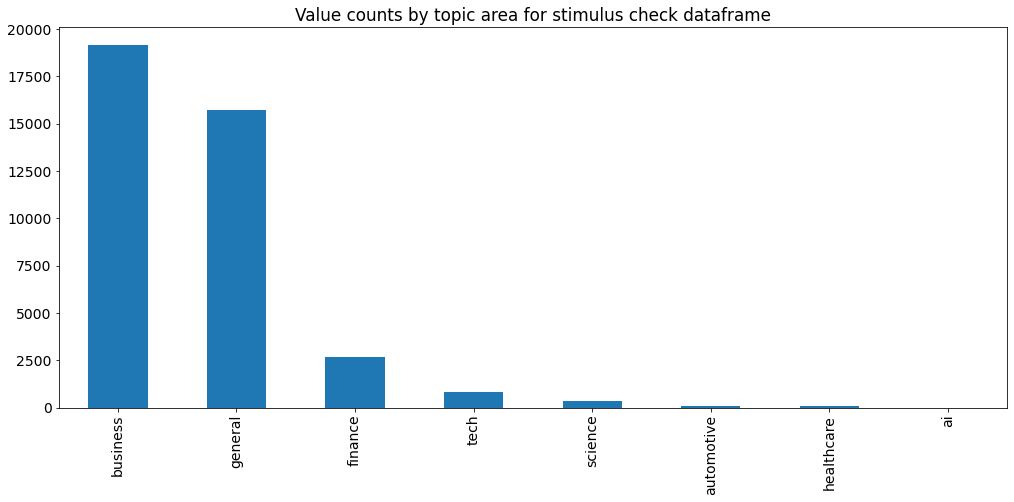

In [9]:
#find the number of articles for each topic area for stimulus check
df_sti['topic_area'].value_counts().plot.bar()
plt.title('Value counts by topic area for stimulus check dataframe')

Text(0.5, 1.0, 'Value counts by topic area for mask dataframe')

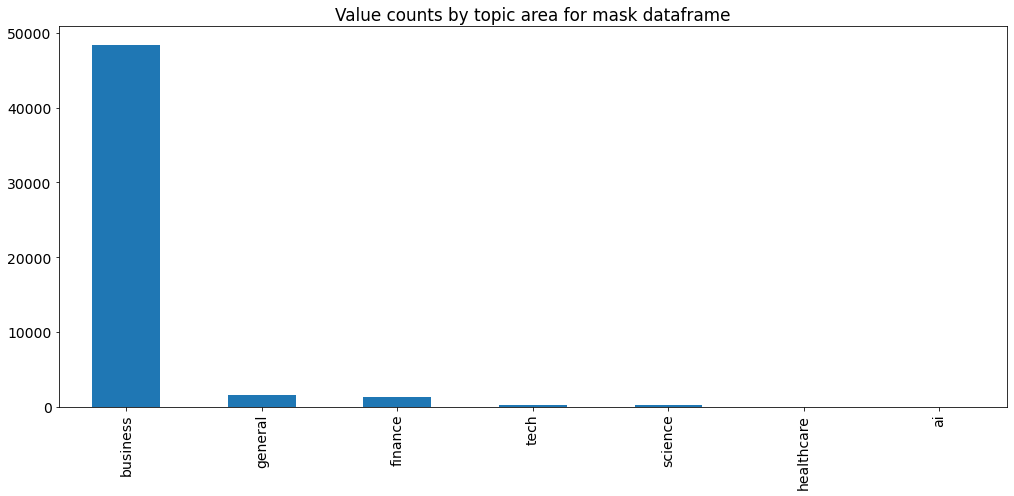

In [10]:
#find the number of articles for each topic area for mask
df_mask['topic_area'].value_counts().plot.bar()
plt.title('Value counts by topic area for mask dataframe')

Text(0.5, 1.0, 'Top 10 Value counts by domain for stimulus check dataframe')

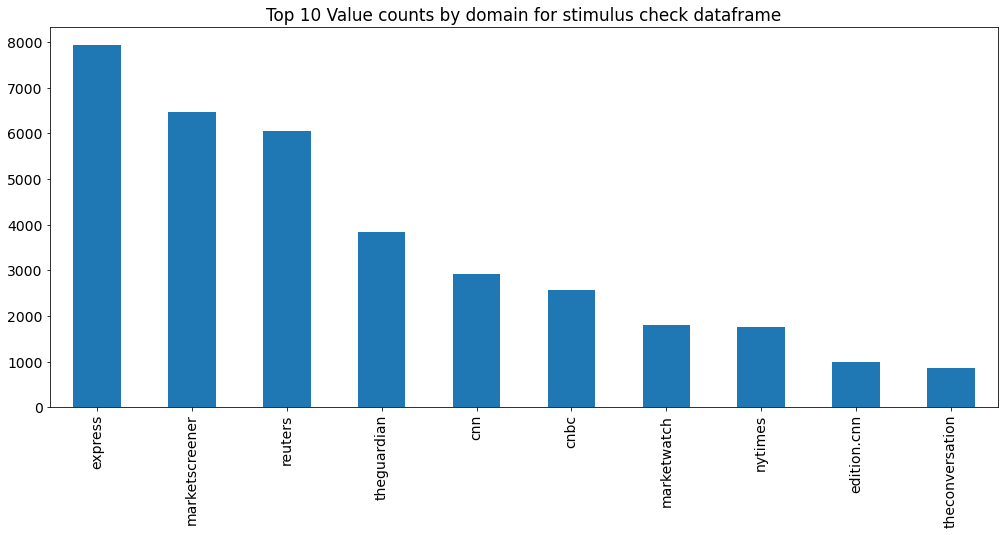

In [11]:
#Find top 10 domains by the number of articles they published for stimulus check  
df_sti['domain'].value_counts()[:10].plot.bar()
plt.title('Top 10 Value counts by domain for stimulus check dataframe')

Text(0.5, 1.0, 'Top 10 Value counts by domain for wearing mask dataframe')

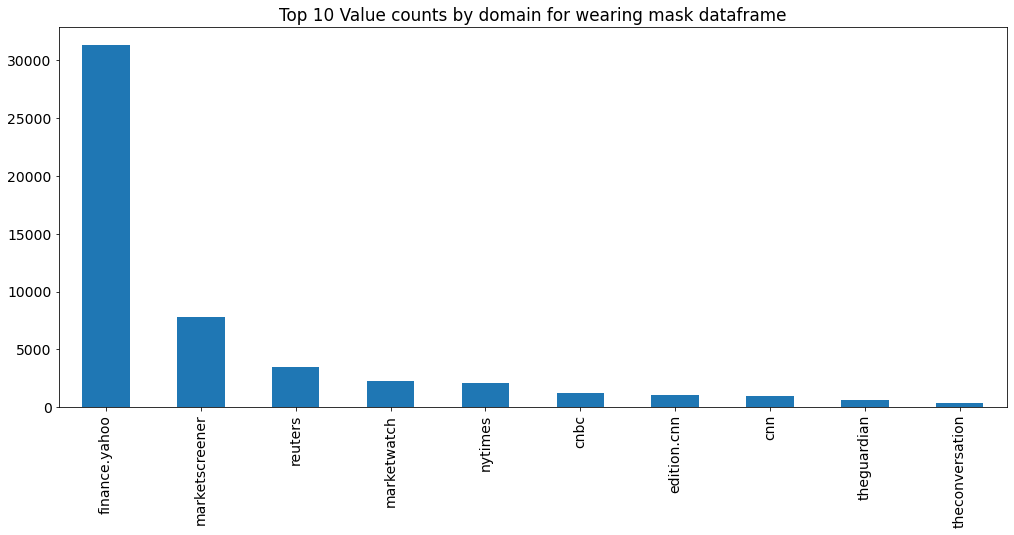

In [12]:
#Find top 10 domains by the number of articles they published for mask
df_mask['domain'].value_counts()[:10].plot.bar()
plt.title('Top 10 Value counts by domain for wearing mask dataframe')

In [13]:
#Find the number of articles published by month
print('Value counts by month for stimulus check dataframe:\n', df_sti['date'].dt.month.apply(lambda x: 'March' if x==3 else 'April').value_counts())
print('\n')
print('Value counts by month for mask dataframe:\n', df_mask['date'].dt.month.apply(lambda x: 'June' if x==6 else 'July').value_counts())


Value counts by month for stimulus check dataframe:
 April    34730
March     4157
Name: date, dtype: int64


Value counts by month for mask dataframe:
 July    47519
June     4402
Name: date, dtype: int64


## Exploratory Analysis

### Word Frequency

In [14]:
#lower case all words
df_sti['content'] = df_sti['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_mask['content'] = df_mask['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
#remove special characters in content
df_sti['content'] = df_sti['content'].str.replace(r"[^a-zA-Z\d\_\s]", "")
df_mask['content'] = df_mask['content'].str.replace(r"[^a-zA-Z\d\_\s]", "")

In [16]:
#tokenize words for each article
tokenized_sti = df_sti.assign(tokenized_content = df_sti['content'].apply(nltk.word_tokenize))
tokenized_mask = df_mask.assign(tokenized_content = df_mask['content'].apply(nltk.word_tokenize))

In [17]:
# import stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [18]:
#filter out stopwords in the content column
tokenized_sti['tokenized_content'] = tokenized_sti['tokenized_content'].apply(lambda x: [item for item in x if item not in stop_words] )
tokenized_mask['tokenized_content'] = tokenized_mask['tokenized_content'].apply(lambda x: [item for item in x if item not in stop_words] )

In [19]:
#Reducing all words into their root words
from nltk.stem import PorterStemmer
ps = PorterStemmer()
tokenized_sti['tokenized_content'] = tokenized_sti['tokenized_content'].apply(lambda x: [ps.stem(y) for y in x])
tokenized_mask['tokenized_content'] = tokenized_mask['tokenized_content'].apply(lambda x: [ps.stem(y) for y in x])

In [20]:
#Stack up words appeared in the tokenized content column
most_1 = np.hstack(tokenized_sti['tokenized_content'])

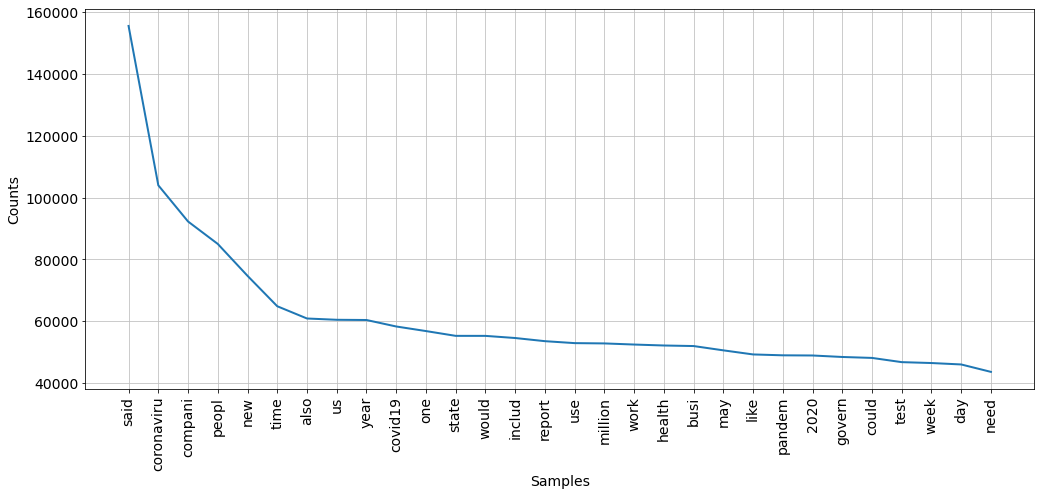

In [21]:
# calculate word frequency
fdist_most = FreqDist(most_1)

for punc in list(string.punctuation)+['``',"''","'s", "“", "”", "’", "--"]:
    del fdist_most[punc]

#plot 30 most frequent words appeared in media articles
fdist_most.plot(30, cumulative=False)


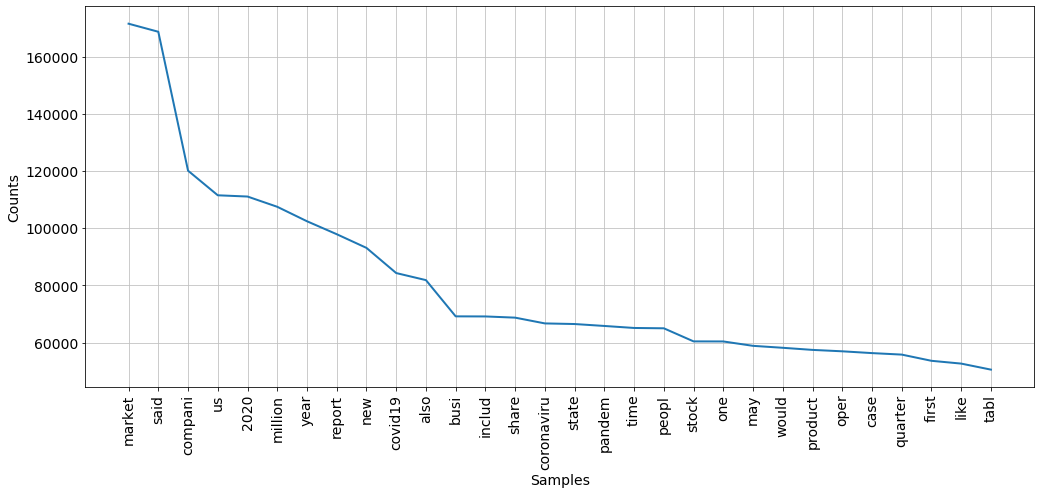

In [24]:
#Stack up words appeared in the tokenized content column
most_2 = np.hstack(tokenized_mask['tokenized_content'])
# calculate word frequency
fdist_most = FreqDist(most_2)
for punc in list(string.punctuation)+['``',"''","'s", "“", "”", "’", "--"]:
    del fdist_most[punc]
#plot 30 most frequent words appeared in media articles
fdist_most.plot(30, cumulative=False)

# Data Analysis and Results

### Sentiment Scores

In [20]:
#Create analyzer object to be ready for the later sentiment calculation
analyser = SentimentIntensityAnalyzer()

In [21]:
#Calculate the compound sentiment score for each article in the stimulus check dataframe
df_sti_sentiment = df_sti.copy()
def compound_score(content):
    return analyser.polarity_scores(content)['compound']
df_sti_sentiment['compound_sentiment'] = df_sti['content'].apply(compound_score)


In [22]:
#Calculate the compound sentiment score for each article in the mask dataframe
df_mask_sentiment = df_mask.copy()
df_mask_sentiment['compound_sentiment'] = df_mask['content'].apply(compound_score)


Text(0.5, 1.0, 'average sentiment scores by topic areas for stimulus check dataframe')

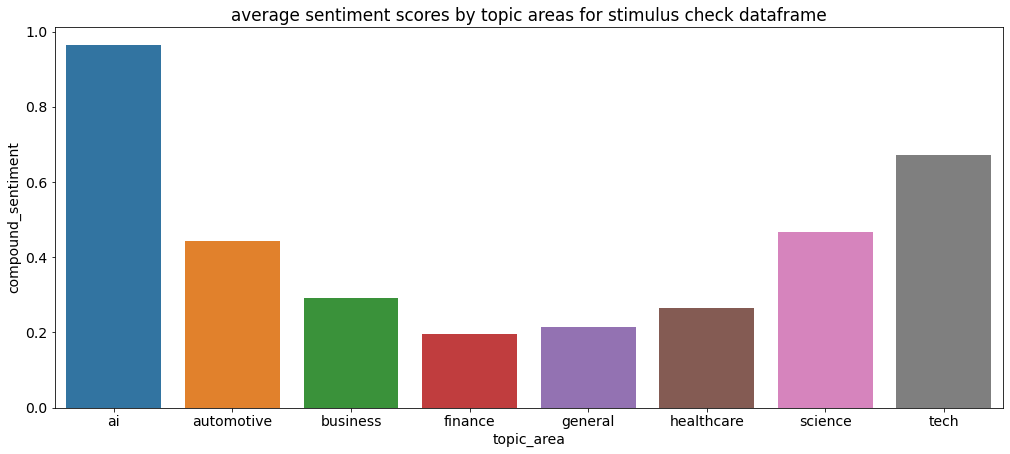

In [23]:
#Make a barplot to show the average sentiment score for each topic area of the stimulus check dataframe
sns.barplot(x="topic_area", y="compound_sentiment", data = df_sti_sentiment.groupby('topic_area').mean().reset_index())
plt.title('average sentiment scores by topic areas for stimulus check dataframe')

Text(0.5, 1.0, 'average sentiment scores by topic areas for mask dataframe')

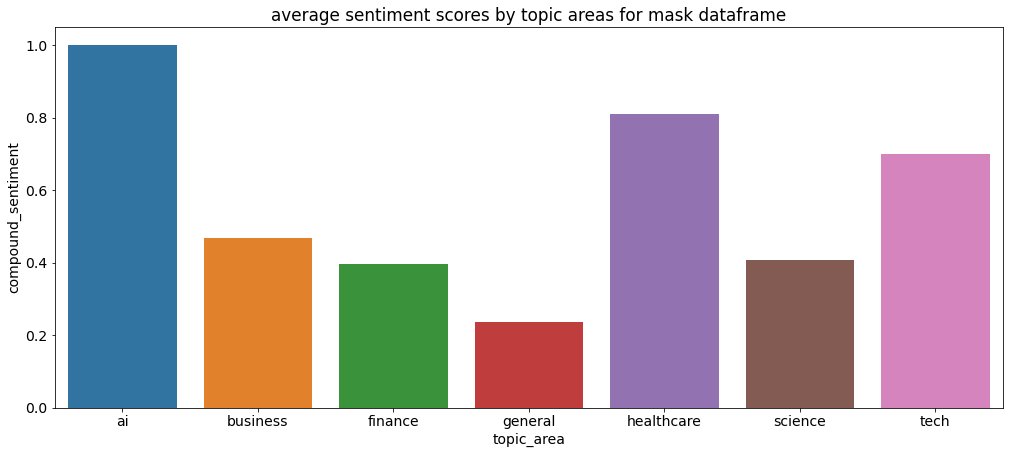

In [24]:
#Make a barplot to show the average sentiment score for each topic area of the mask dataframe
sns.barplot(x="topic_area", y="compound_sentiment", data = df_mask_sentiment.groupby('topic_area').mean().reset_index())
plt.title('average sentiment scores by topic areas for mask dataframe')

Text(0.5, 1.0, 'average sentiment scores by date for stimulus check')

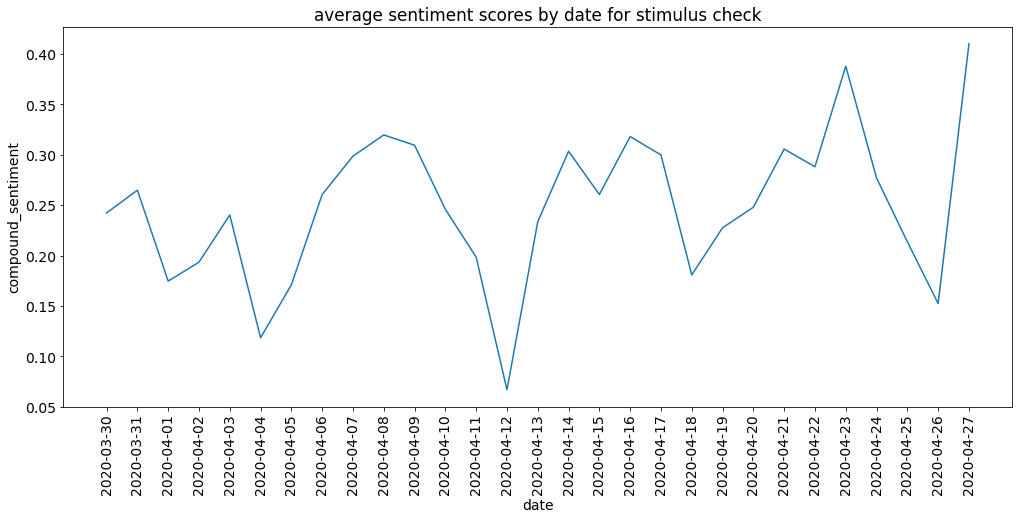

In [25]:
#make a line plot to see the change in average sentiment scores over time for stimulus check dataframe
sns.lineplot(x="date", y="compound_sentiment",data = df_sti_sentiment.groupby('date').mean().reset_index())
plt.xticks(rotation=90)
plt.xticks(df_sti_sentiment.groupby('date').mean().reset_index()['date'])
plt.title('average sentiment scores by date for stimulus check')

Text(0.5, 1.0, 'average sentiment scores by date for mask')

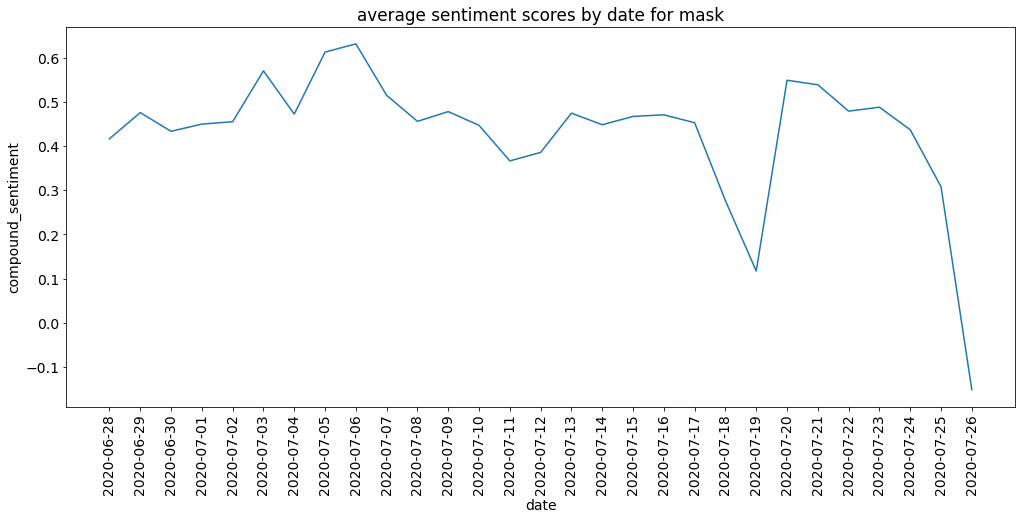

In [26]:
#make a line plot to see the change in average sentiment scores over time for mask dataframe
sns.lineplot(x="date", y="compound_sentiment",data = df_mask_sentiment.groupby('date').mean().reset_index())
plt.xticks(rotation=90)
plt.xticks(df_mask_sentiment.groupby('date').mean().reset_index()['date'])
plt.title('average sentiment scores by date for mask')

In [27]:
#compare dates before and dates after average sentiments

#Split the dataframe into two dataframes according to dates before and after the event


#Split stimulus check dataframe
start_date = '03-30-2020'
end_date = '04-12-2020'
mask = (df_sti_sentiment['date'] >= start_date) & (df_sti_sentiment['date'] <= end_date)
before_df_sti_sentiment = df_sti_sentiment.loc[mask]

start_date = '04-13-2020'
end_date = '04-27-2020'
mask = (df_sti_sentiment['date'] >= start_date) & (df_sti_sentiment['date'] <= end_date)
after_df_sti_sentiment = df_sti_sentiment.loc[mask]

#Split mask dataframe
start_date = '06-28-2020'
end_date = '07-12-2020'
mask = (df_mask_sentiment['date'] >= start_date) & (df_mask_sentiment['date'] <= end_date)
before_df_mask_sentiment = df_mask_sentiment.loc[mask]

start_date = '07-13-2020'
end_date = '07-26-2020'
mask = (df_mask_sentiment['date'] >= start_date) & (df_mask_sentiment['date'] <= end_date)
after_df_mask_sentiment = df_mask_sentiment.loc[mask]

median for stimulus check before:  0.8422
median for stimulus check after:  0.8992


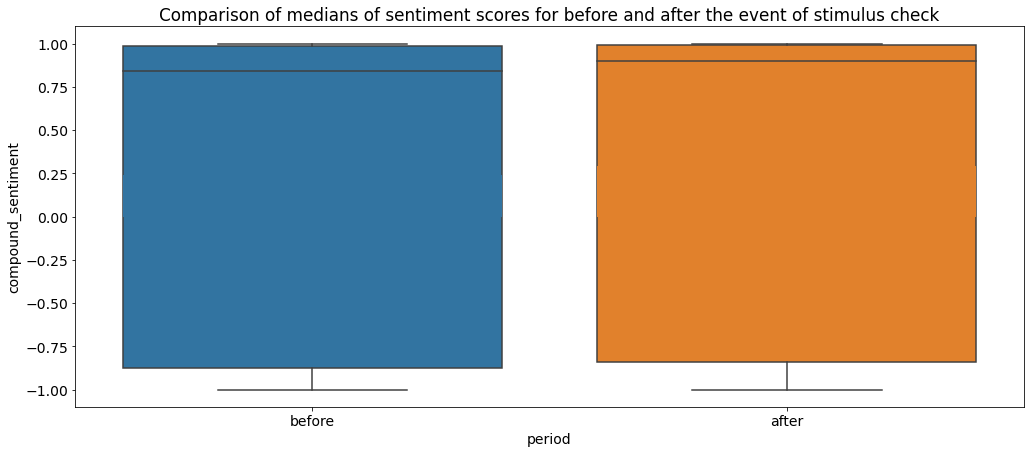

In [28]:
#make a boxplot to compare the median sentiment scores before and after the event of giving out stimulus checks
result_sti = pd.DataFrame({'compound_sentiment':[before_df_sti_sentiment['compound_sentiment'].mean(),after_df_sti_sentiment['compound_sentiment'].mean()], 'time_period':['before', 'after']})
sns.barplot(x='time_period', y = 'compound_sentiment', data = result_sti)
before_df_sti_sentiment = before_df_sti_sentiment.assign(period = 'before')
after_df_sti_sentiment = after_df_sti_sentiment.assign(period = 'after')
result_sti = pd.concat([before_df_sti_sentiment, after_df_sti_sentiment])
sns.boxplot(x='period', y = 'compound_sentiment', data = result_sti)
plt.title('Comparison of medians of sentiment scores for before and after the event of stimulus check')
print('median for stimulus check before: ', before_df_sti_sentiment['compound_sentiment'].median())
print('median for stimulus check after: ',after_df_sti_sentiment['compound_sentiment'].median())

median for facemask before:  0.9432
median for facemask after:  0.9474


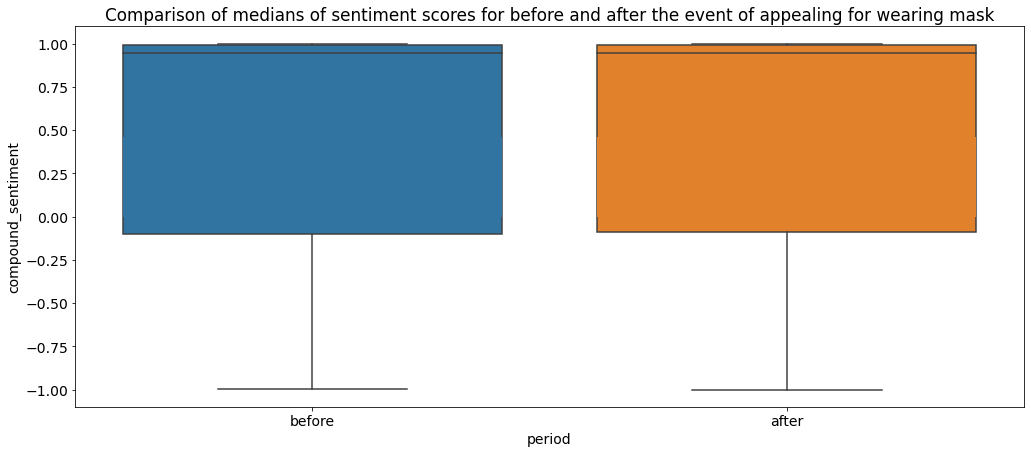

In [29]:
#make a boxplot to compare the median sentiment scores before and after the event of Trump appealing for wearing masks
result_mask = pd.DataFrame({'compound_sentiment':[before_df_mask_sentiment['compound_sentiment'].mean(),after_df_mask_sentiment['compound_sentiment'].mean()], 'time_period':['before', 'after']})
sns.barplot(x='time_period', y = 'compound_sentiment', data = result_mask)
before_df_mask_sentiment = before_df_mask_sentiment.assign(period = 'before')
after_df_mask_sentiment = after_df_mask_sentiment.assign(period = 'after')
result_mask = pd.concat([before_df_mask_sentiment, after_df_mask_sentiment])
sns.boxplot(x='period', y = 'compound_sentiment', data = result_mask)
plt.title('Comparison of medians of sentiment scores for before and after the event of appealing for wearing mask')
print('median for facemask before: ',before_df_mask_sentiment['compound_sentiment'].median())
print('median for facemask after: ',after_df_mask_sentiment['compound_sentiment'].median())

# Explanatory Analysis


In [30]:
#Split each event into two time intervals: before the event happened and after the event happened, each contains data for two weeks

start_date = '03-30-2020'
end_date = '04-12-2020'
mask = (tokenized_sti['date'] >= start_date) & (tokenized_sti['date'] <= end_date)
before_tokenized_sti = tokenized_sti.loc[mask]

start_date = '04-13-2020'
end_date = '04-27-2020'
mask = (tokenized_sti['date'] >= start_date) & (tokenized_sti['date'] <= end_date)
after_tokenized_sti = tokenized_sti.loc[mask]

#(06/28/2020 - 07/26/2020)
start_date = '06-28-2020'
end_date = '07-12-2020'
mask = (tokenized_mask['date'] >= start_date) & (tokenized_mask['date'] <= end_date)
before_tokenized_mask = tokenized_mask.loc[mask]

start_date = '07-13-2020'
end_date = '07-26-2020'
mask = (tokenized_mask['date'] >= start_date) & (tokenized_mask['date'] <= end_date)
after_tokenized_mask = tokenized_mask.loc[mask]

## Analysis for Giving Out Stimulus Checks

In [31]:
# Find the frequency of words in the before stimulus check dataframe.
most_before_sti = np.hstack(before_tokenized_sti['tokenized_content'])

#calculate word frequency
fdist_most = FreqDist(most_before_sti)

for punc in list(string.punctuation)+['``',"''","'s", "“", "”", "’", "--"]:
    del fdist_most[punc]


In [32]:
# Find the frequency of words in the before stimulus check dataframe.
most_after_sti = np.hstack(after_tokenized_sti['tokenized_content'])

#calculate word frequency
fdist_after = FreqDist(most_after_sti)

for punc in list(string.punctuation)+['``',"''","'s", "“", "”", "’", "--"]:
    del fdist_after[punc]

Text(0.5, 1.0, 'Comparison of the top 30 frequent words in the dataset for before and after the event of stimulus check')

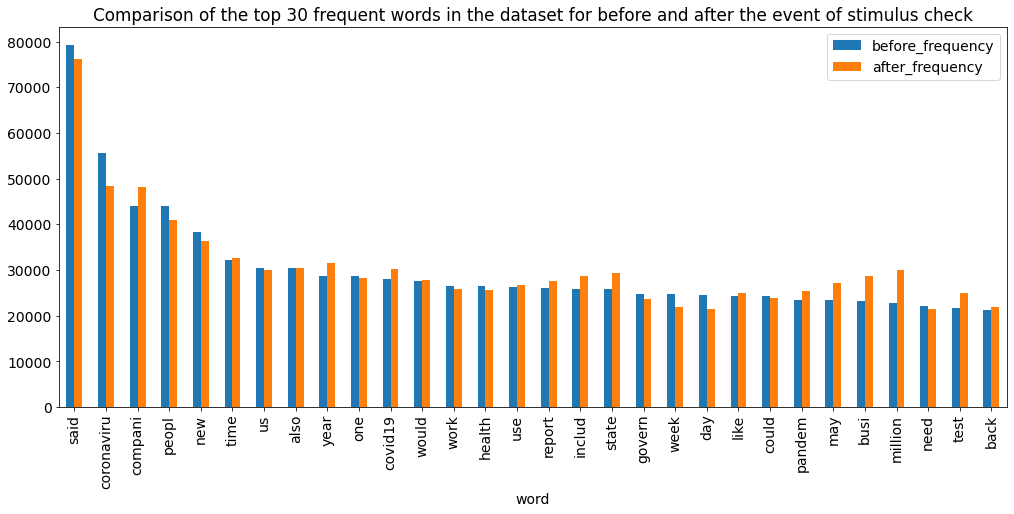

In [33]:
# making a groupped bar graph with 30 most frequent words to compare the frequency of words in before and after stimulus check dataframe.
frequency_sti = pd.DataFrame(fdist_most.items(), columns=['word', 'before_frequency']).sort_values('before_frequency',ascending = False)
frequency_sti = pd.merge(frequency_sti, pd.DataFrame(fdist_after.items(), columns=['word', 'after_frequency']), on = 'word', how = 'outer')
frequency_sti = frequency_sti.set_index('word')[:30]
frequency_sti.plot.bar()
plt.xticks(range(0,len(frequency_sti.index)), frequency_sti.index, rotation = 90);
plt.title('Comparison of the top 30 frequent words in the dataset for before and after the event of stimulus check')

## From the chart above we can see that:
#### There's an observable <i>increase</i> in word frequency from before to after in the following words:
   - compani (4016 more)
   - year (2874 more)
   - covid19 (2371 more)
   - includ (2665 more)
   - state (3384 more)
   - pandem (1973 more)
   - may (3893 more)
   - busi (5599 more)
   - million (7253 more)
   - test (3241 more)
#### There's an observable <i>decrease</i> in word frequency from before to after in the following words:
<br>
   - coronaviru (7081 less)
   - peopl (2958 less)
   - week (2866 less)
   - day (3147 less)

Among these words, year, includ, state, may, week, day are considered as neutral words.

In the words that describe the covid 19, though the occurences of covid19 and pandem increased by a total of 4344 times, coronaviru solely decreased by 7081 times, meaning that there are less reports about covid 19 and possibly this leads to an improvement in sentiment score.
<br>
<br>
Compani, busi, million appeared more and peopl appeared less, this change might be correlated with the event of giving out stimulus checks. Medias were more focused on business and less on people. Since the purpose of giving out stimulus checks is to stimulate the market, medias might have positive attitudes towards the prospect of market and business, so the sentiment score increased.


## Compare the average sentiment score for before and after the stimulus check event happened

Text(0.5, 1.0, 'Comparison of the average sentiment score in each topic area for before and after the stimulus check event')

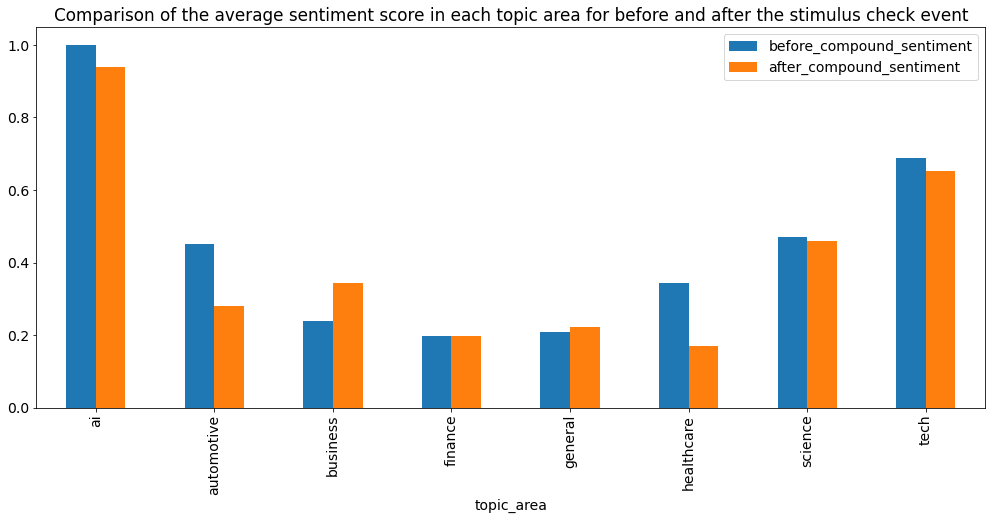

In [34]:
#make a groupped bar plot to compare the sentiment score by topic area for before and after the event happened
before_df_sti_sentiment_ave = before_df_sti_sentiment.groupby('topic_area').mean().reset_index()
before_df_sti_sentiment_ave.columns = ['topic_area', 'before_compound_sentiment']
after_df_sti_sentiment_ave = after_df_sti_sentiment.groupby('topic_area').mean().reset_index()
after_df_sti_sentiment_ave.columns = ['topic_area', 'after_compound_sentiment']
merged_df_sti_ave = before_df_sti_sentiment_ave.merge(after_df_sti_sentiment_ave,on = 'topic_area', how='outer').set_index('topic_area')
merged_df_sti_ave.plot.bar()
plt.title('Comparison of the average sentiment score in each topic area for before and after the stimulus check event')

## Compare the total sentiment score for before and after the event of giving out stimulus checks happened

Text(0.5, 1.0, 'Comparison of the sum sentiment score in each topic area for before and after the stimulus check event')

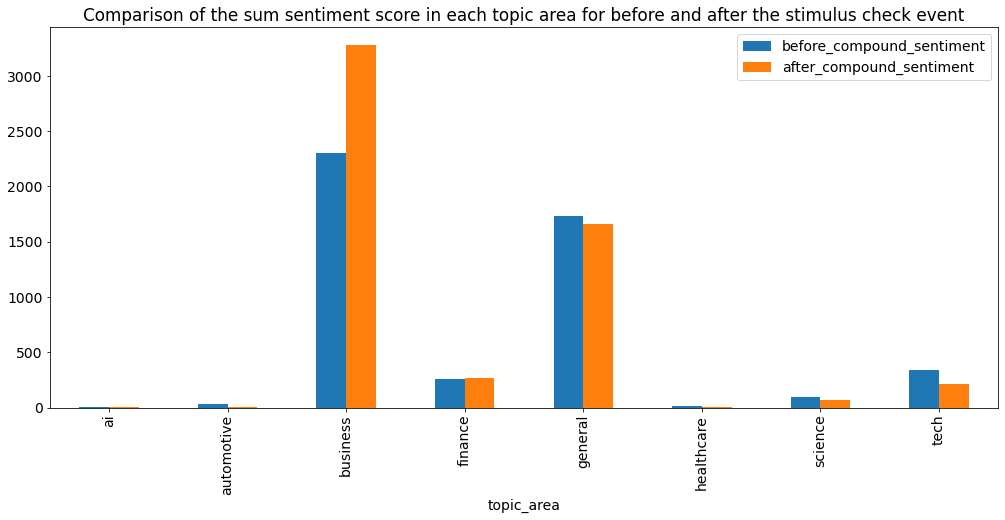

In [35]:
#make a groupped bar plot to compare the total sentiment score for before and after the event of releasing stimulus checks
before_df_sti_sentiment_sum = before_df_sti_sentiment.groupby('topic_area').sum().reset_index()
before_df_sti_sentiment_sum.columns = ['topic_area', 'before_compound_sentiment']
after_df_sti_sentiment_sum = after_df_sti_sentiment.groupby('topic_area').sum().reset_index()
after_df_sti_sentiment_sum.columns = ['topic_area', 'after_compound_sentiment']
merged_df_sti_sum = before_df_sti_sentiment_sum.merge(after_df_sti_sentiment_sum,on = 'topic_area', how='outer').set_index('topic_area')
merged_df_sti_sum.plot.bar()
plt.title('Comparison of the sum sentiment score in each topic area for before and after the stimulus check event')

In [36]:
#Find the number of articles by topic area for before and after the event of releasing stimulus checks
value_counts_sti = before_df_sti_sentiment['topic_area'].value_counts().to_frame().merge(after_df_sti_sentiment['topic_area'].value_counts().to_frame(), left_index = True, how = 'outer', right_index = True)
value_counts_sti.columns = ['before_number_of_articles', 'after_number_of_articles']
value_counts_sti

,before_number_of_articles,after_number_of_articles
ai,2,3
automotive,81,3
business,9636,9512
finance,1300,1374
general,8273,7465
healthcare,40,33
science,193,153
tech,488,331


From the two charts amd the table above we can see that, in articles of the business topic, while the number of articles are close, there are huge increments in average and total sentiment score. The total score for other topic areas remain roughly the same. This change in score should be related to the event of giving out stimulus checks and explains the increase in sentiment scores.

# Analysis for the news that Donald Trump appealing for wearing a face mask¶

In [37]:
# Find the frequency of words in the before mask dataframe.
most_before_mask = np.hstack(before_tokenized_mask['tokenized_content'])

#calculate word frequency
fdist_most_before = FreqDist(most_before_mask)

for punc in list(string.punctuation)+['``',"''","'s", "“", "”", "’", "--"]:
    del fdist_most_before[punc]


In [38]:
# Find the frequency of words in the before mask dataframe.
most_after_mask = np.hstack(after_tokenized_mask['tokenized_content'])

#calculate word frequency
fdist_after = FreqDist(most_after_sti)

for punc in list(string.punctuation)+['``',"''","'s", "“", "”", "’", "--"]:
    del fdist_after[punc]

In [39]:
#calculate word frequency
fdist_after = FreqDist(most_after_mask)

for punc in list(string.punctuation)+['``',"''","'s", "“", "”", "’", "--"]:
    del fdist_after[punc]

Text(0.5, 1.0, 'Comparison of the top 30 frequent words in the dataset for before and after the event of wearing mask')

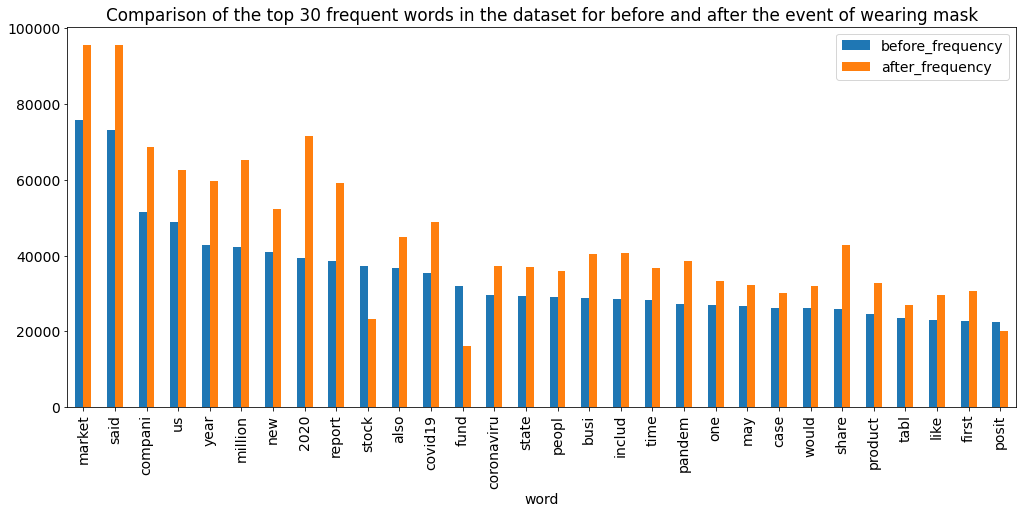

In [40]:
# making a groupped bar graph with 30 most frequent words to compare the frequency of words in before and after mask dataframe.
frequency_mask = pd.DataFrame(fdist_most_before.items(), columns=['word', 'before_frequency']).sort_values('before_frequency',ascending = False)
frequency_mask = pd.merge(frequency_mask, pd.DataFrame(fdist_after.items(), columns=['word', 'after_frequency']), on = 'word', how = 'outer')
frequency_mask = frequency_mask.set_index('word')[:30]
frequency_mask.plot.bar()
plt.xticks(range(0,len(frequency_mask.index)), frequency_mask.index, rotation = 90);
plt.title('Comparison of the top 30 frequent words in the dataset for before and after the event of wearing mask')

## From the chart above we can see that:
Aside from the neutral words,
#### There's an observable <i>increase</i> in word frequency from before to after in the following words:
   - market (19883 more)
   - compani (17178 more)
   - million (22900 more)
   - covid19 (13713 more)
   - coronaviru (7716 more)
   - busi (11633 more)
   - pandem (11113 more)
   - product (8227 more)

#### There's an observable <i>decrease</i> in word frequency from before to after in the following words:

  - stock (13965 less)
  - fund (15721 less)

We can infer from these word frequency changes that after Trump started wearing a facemask, media didn't pay too much attention on this event. The main area medias focused on was still the financial area. Since this event didn't make an impac, it is reasonable to observe little change in sentiment scores from the analysis we did above.  

## Compare the average sentiment score for before and after the stimulus check event happened

Text(0.5, 1.0, 'Comparison of the average sentiment score in each topic area for before and after the wearing mask event')

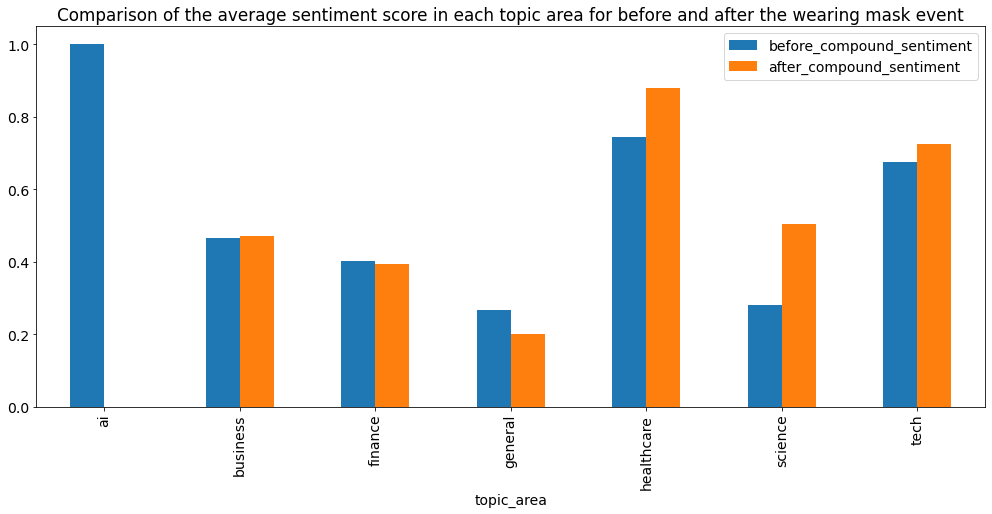

In [41]:
#make a groupped bar plot to compare the average sentiment score by topic area for before and after the event happened
before_df_mask_sentiment_ave = before_df_mask_sentiment.groupby('topic_area').mean().reset_index()
before_df_mask_sentiment_ave.columns = ['topic_area', 'before_compound_sentiment']
after_df_mask_sentiment_ave = after_df_mask_sentiment.groupby('topic_area').mean().reset_index()
after_df_mask_sentiment_ave.columns = ['topic_area', 'after_compound_sentiment']
merged_df_mask_ave = before_df_mask_sentiment_ave.merge(after_df_mask_sentiment_ave,on = 'topic_area', how='outer').set_index('topic_area')
merged_df_mask_ave.plot.bar()
plt.title('Comparison of the average sentiment score in each topic area for before and after the wearing mask event')

## Compare the total sentiment score for before and after the event of Trump appealing wearing mask happened

Text(0.5, 1.0, 'Comparison of the sum sentiment score in each topic area for before and after the wearing mask event')

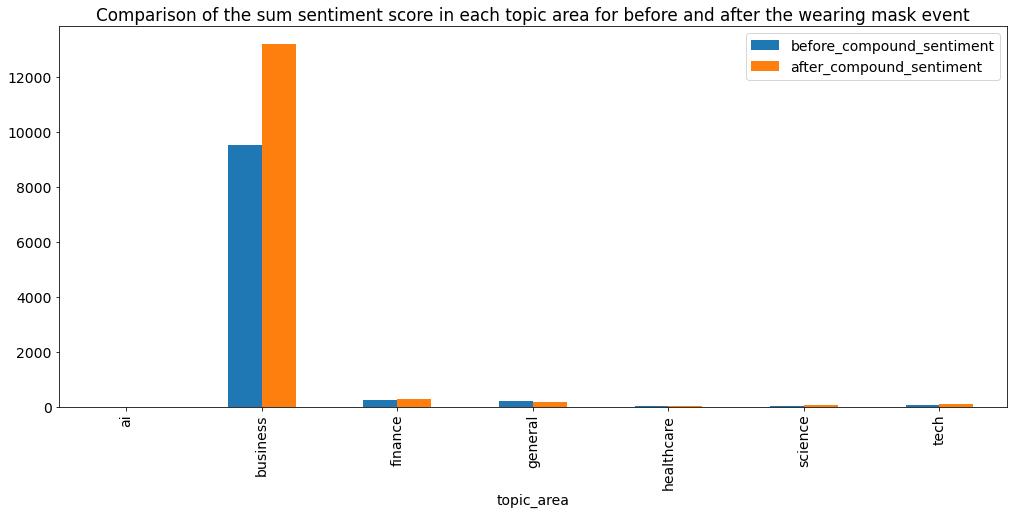

In [42]:
#make a groupped bar plot to compare the total sentiment score by topic area for before and after the event happened
before_df_mask_sentiment_sum = before_df_mask_sentiment.groupby('topic_area').sum().reset_index()
before_df_mask_sentiment_sum.columns = ['topic_area', 'before_compound_sentiment']
after_df_mask_sentiment_sum = after_df_mask_sentiment.groupby('topic_area').sum().reset_index()
after_df_mask_sentiment_sum.columns = ['topic_area', 'after_compound_sentiment']
merged_df_mask_sum = before_df_mask_sentiment_sum.merge(after_df_mask_sentiment_sum,on = 'topic_area', how='outer').set_index('topic_area')
merged_df_mask_sum.plot.bar()
plt.title('Comparison of the sum sentiment score in each topic area for before and after the wearing mask event')

In [43]:
#Find the number of articles by topic area for before and after the event of Trump wearing the mask in the public
value_counts_mask = before_df_mask_sentiment['topic_area'].value_counts().to_frame().merge(after_df_mask_sentiment['topic_area'].value_counts().to_frame(), left_index = True, how = 'outer', right_index = True)
value_counts_mask.columns = ['before_number_of_articles', 'after_number_of_articles']
value_counts_mask

,before_number_of_articles,after_number_of_articles
ai,1,NaN
business,20382,28044.0
finance,636,715.0
general,839,786.0
healthcare,28,28.0
science,100,127.0
tech,117,118.0


The table above shows that business articles are the main contributers to the sentiment score while the average sentiment score for before and after stayed roughly the same according to the average sentiment score chart. This explains why there is little change in sentiment score between before and after the event of Trump wearing mask happened.

# Ethics and Privacy
   Since our proposed datasets are supposed to be composed of articles from public media sources, we shouldn't need to worry about getting permissions because the articles are accessible to everyone. Similarly, there is no privacy concern about using articles that contain no personal data or any other sensitive information. To maintain the originality of the articles, we should not drop any words or change orders of the paragraph/words during the data cleaning and data wrangling process, because any minor changes of the original article may result in a serious change in its sentiment.

We admit the fact that part of our original datasets may be biased. Clearly, different media would bring different sentiments into their article and sentiment is always extremely sensitive to the change of times. In the beginning, when COVID-19 is not serious in the United States, all media articles write from the perspective of bystanders. However, when everyone’s lives are severely disrupted by COVID-19, some of those articles may blindly carry negative emotions and share more of their injustice views compared to other media. Hence, we would set the beginning time as the first case of COVID-19 in the U.S. to minimize potential problems brought by media changing their positions over time. On the other hand, because COVID-19 related articles tend to be negative in general, we would pay close attention to the trend of sentiment to figure out whether US government successfully boost citizens confidence by those two events. To be clarified, since all of our team members are Chinese citizens, it is very possible that we have some different understanding of specific US policy and articles than typical US citizens. Therefore, we need to be extra careful when analyzing the sentiment of the most frequent words as objectively as possible.

As the consequence, if we can successfully analyze the sentiment change, our result and conclusion maybe helpful and even enlighten for US policy to decide what should be their next move.

# Conclusion & Discussion
In this study, we aim to find if there’s a significant difference in the sentiment changes before and after  two events: distributing stimulus checks and Trump’s first appearance in the public wearing a face mask. 

After our analysis, we found that giving out stimulus checks caused a greater change in attitude that can be seen in the overall sentiment score of COVID-19 related mass media reports than Trump starting wearing face masks. We found one possible driving force of this difference in sentiment change, which is while most of the articles in our dataset are in the business domain, and that Trump starting wearing face masks as a relatively non-business news, so the sentiment on average didn't change that much from our chosen dataset. In contrast, giving out stimulus checks, a more business/financial related act of the government, drew more attention in the business / financial domain of media reports and is more likely to increased the average sentiment scores comparing to what it was before. 

We do believe that the analysis we’ve done has some limitations:
- Other events may also happen during the time slots we determined that has a larger influence on sentiments than the two events we have chosen. eg. The government announced a social distancing policy around the end of March, which is pretty close to the date of distributing the stimulus check.
- Media reports may be biased towards different parties of the United States. The parties’ opinions may have an effect on the reports’ overall sentiment towards releasing stimulus checks and Trump’s first appearance with a face mask.
- Words like "like" has a pretty high word frequency in our data, but it has different meanings and may have a sentiment score that is only based on one of its meanings.

Therefore, further studies need to be done to overcome these limitations. We might need to make more analysis on the significance of the events we’ve chosen are necessarily causing these sentiment changes, and the relationship we’ve discovered is free of confounds. Besides, more refined and fair articles and a more accurate sentiment analyzer may be used in our analysis. This can be pretty hard because understanding the exact sentiment of an article by using data needs more work to be done in other fields like semantics and syntax to help coping with different writing styles such as sarcasm, identifying quotes used in articles that are not necessarily contributing to the authors’ argument, and so on. Generally speaking, the results we’ve found so far can at least be useful in such a pandemic and help different organizations to understand the media’s and the public’s opinions in similar events.


# Team Contributions 

Qiwen Zhang：Hypothesis, Data Cleaning, Data Analysis & Results, Extra video, Contribution

Jiali Qian：Background and Prior Work, Data Analysis & Results, Data Cleaning, Extra video, Contribution

Zijie Qi：Dataset, Research Question, Data Analysis & Results, Extra video, Contribution

Mai Yang：Background and Prior Work, Conclusion & Discussion, Extra video, Contribution

Guanchen Luo：Overview, Ethics & Privacy, Data Cleaning, Proofreading, Extra video, Contribution